### Linear regression using closed-form analytical solution

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

Text(0,0.5,'Y')

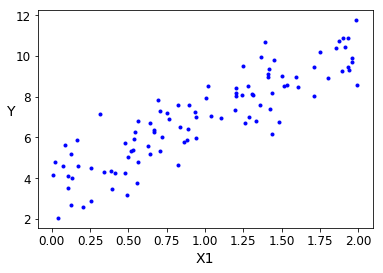

In [10]:
plt.plot(X,y,'b.')
plt.xlabel('X1')
plt.ylabel('Y',rotation=0)

In [11]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[3.70471942],
       [3.31364184]])

In [14]:
y_0 = theta_best.T.dot(np.array([1,0]))
y_2 = theta_best.T.dot(np.array([1,2]))

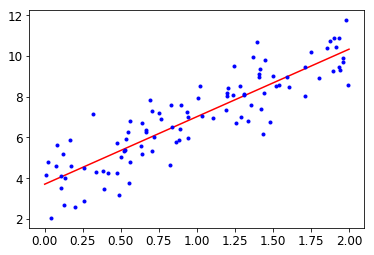

In [18]:
plt.plot([0,2],[y_0,y_2],'r-')
plt.plot(X,y,'b.')

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.70471942]), array([[3.31364184]]))

### Linear regression using batch gradient descent

In [33]:
eta = 0.1
rounds = 1000
theta = np.random.randn(2,1)

for i in range(rounds):
    delta = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * delta

In [34]:
theta

array([[3.70471942],
       [3.31364184]])

In [92]:
theta_path_gd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_b, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_path_gd.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
#     plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

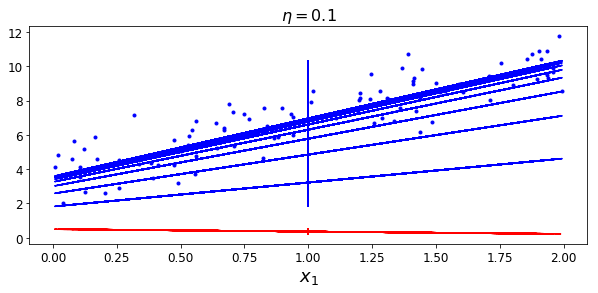

In [93]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plot_gradient_descent(theta, eta=0.1)

# save_fig("gradient_descent_plot")
plt.show()

### Stochastic and mini-batch gradient descent

In [68]:
theta_path_bgd = []
m = len(X_b)

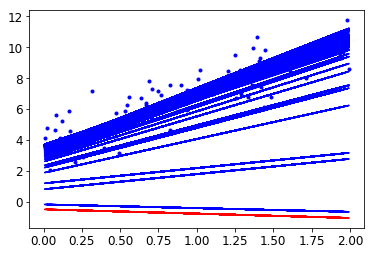

In [69]:
n_epochs = 50
t0=5
t1=50

def learning_schedule(t):
    return t0 / (t + t1) #annealing algorithm

theta = np.random.randn(2,1)
plt.plot(X,y,'b.')

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i == 0:
            plt.plot(X,X_b.dot(theta),'r-')
        else:
            plt.plot(X,X_b.dot(theta),'b-')
        x_i = X_b[i:i+1,:]
        y_i = y[i:i+1]
        delta = x_i.T.dot(x_i.dot(theta) - y_i)
        theta = theta - learning_schedule(m * epoch + i) * delta
        theta_path_bgd.append(theta)

In [70]:
theta

array([[3.69042073],
       [3.32474097]])

In [51]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [52]:
sgd_reg.intercept_

array([3.65309446])

In [53]:
sgd_reg.coef_

array([3.25391801])

In [54]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [55]:
theta

array([[3.85777731],
       [3.48672751]])

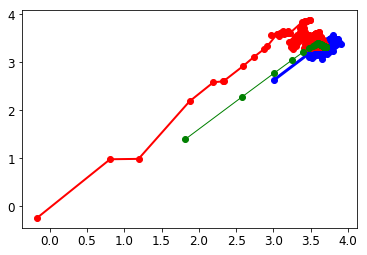

In [94]:
theta_path_mgd = np.array(theta_path_mgd)
theta_path_bgd = np.array(theta_path_bgd)
theta_path_gd = np.array(theta_path_gd)
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "b-o", linewidth=3, label="mini-batch")
plt.plot(theta_path_bgd[:,0],theta_path_bgd[:,1],'r-o',linewidth=2,label='stochastic')
plt.plot(theta_path_gd[:,0],theta_path_gd[:,1],'g-o',linewidth=1,label='batch')

### Polynomial regression

In [99]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

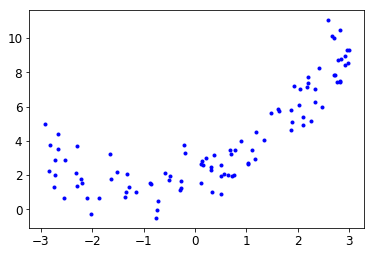

In [100]:
plt.plot(X,y,'b.')

In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)

In [105]:
X[0]

array([-2.66218035])

In [106]:
X_poly[0]

array([-2.66218035,  7.08720419])

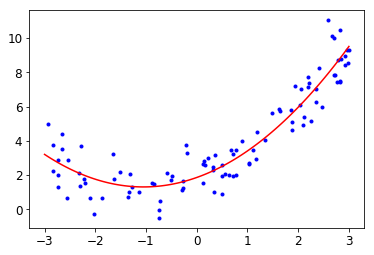

In [118]:
X_new = np.linspace(-3,3,100)
X_new_poly = poly_features.transform(X_new.reshape(-1,1))
y_predict = lin_reg.predict(X_new_poly)
plt.plot(X,y,'b.')
plt.plot(X_new,y_predict,'r-')

### Regularized models

In [120]:
from sklearn.linear_model import Ridge
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

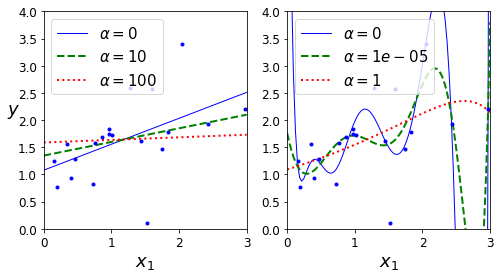

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

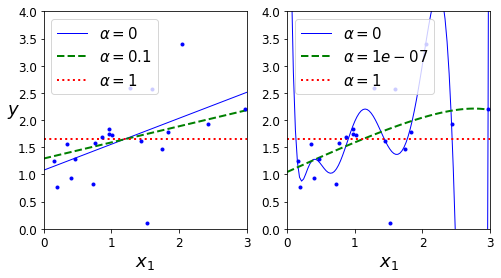

In [133]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

# save_fig("lasso_regression_plot")
plt.show()

###  Batch Gradient Descent with early stopping for Softmax Regression

In [134]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [211]:
X = iris["data"]  # petal length, petal width
y = iris["target"]

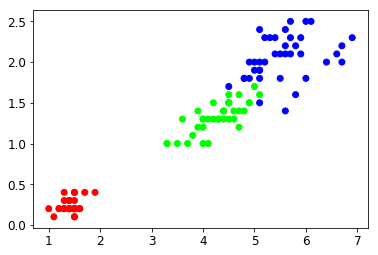

In [213]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [214]:
X = np.c_[np.ones([len(X),1]),X]

In [215]:
n_classes = np.max(y) + 1

In [216]:
y_onehot = np.zeros((len(y),n_classes))

In [217]:
y_onehot[np.arange(len(y)),y] = 1

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y_onehot,test_size=0.1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)

In [221]:
X_train.shape

(108, 5)

In [222]:
def validate(theta,X,y):
    softmax = np.exp(X.dot(theta)) / np.sum(np.exp(X.dot(theta)),axis=1,keepdims=True)
    total_sum = (np.argmax(softmax,axis=1) == np.argmax(y,axis=1)).sum()
    return total_sum / X.shape[0]

In [232]:
n_epochs = 5000
theta = np.random.randn(5,3)
best_theta = None
best_accuracy = float("-inf")

for epoch in range(n_epochs):
    for mini in range(0,X_train.shape[0],18):
        X_batch = X_train[mini:mini+18,:]
        y_batch = y_train[mini:mini+18]
        softmax = np.exp(X_batch.dot(theta)) / np.sum(np.exp(X_batch.dot(theta)),axis=1,keepdims=True)
        delta = 0.0625 * X_batch.T.dot(softmax - y_batch)
        theta = theta - learning_schedule(epoch*X_train.shape[0]+mini) * delta
        if validate(theta,X_val,y_val) > best_accuracy:
            best_theta = theta
            best_accuracy = validate(theta,X_val,y_val)

In [233]:
best_accuracy

1.0

In [235]:
best_theta

array([[-2.65846726,  0.07125677,  0.27550802],
       [-0.0574811 , -0.43568382, -1.04250288],
       [-0.00749988, -0.56652375, -0.66396969],
       [-0.78530743, -0.34093588,  0.08900617],
       [-0.73986356, -0.57134603,  0.53967833]])

In [236]:
validate(best_theta,X_test,y_test)

0.9333333333333333